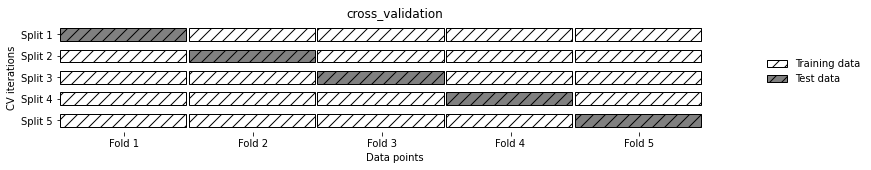

In [13]:
import mglearn
mglearn.plots.plot_cross_validation()

## k-fold cross validation (kNN)

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
iris = load_iris()
scaler = StandardScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [3]:
score_train = []
score_test = []

for train_idx, test_idx in kfold.split(iris.data, iris.target):
    
    X_train = iris.data[train_idx]
    y_train = iris.target[train_idx]
    X_test = iris.data[test_idx]
    y_test = iris.target[test_idx]
    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train_scaled, y_train)
    
    y_train_hat = clf.predict(X_train_scaled)
    score_train.append(accuracy_score(y_train, y_train_hat))    
    y_test_hat = clf.predict(X_test_scaled)
    score_test.append(accuracy_score(y_test, y_test_hat))

In [5]:
score_train, score_test

([0.9666666666666667, 0.9583333333333334, 0.975, 0.9583333333333334, 0.975],
 [0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 0.9])

## grid search with train,val,test

#### select the best hyperparameter using the validation set

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=1)

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        y_valid_hat = svm.predict(X_valid)
        score = accuracy_score(y_valid, y_valid_hat)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

#### build a model on both training and validation data

In [5]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
y_test_hat = svm.predict(X_test)
test_score = accuracy_score(y_test, y_test_hat)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best hyperparameters: ", best_parameters)
print("Test set score with best hyperparameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best hyperparameters:  {'C': 10, 'gamma': 0.001}
Test set score with best hyperparameters: 0.92


## grid search with cross validation (using GridSearchCV)

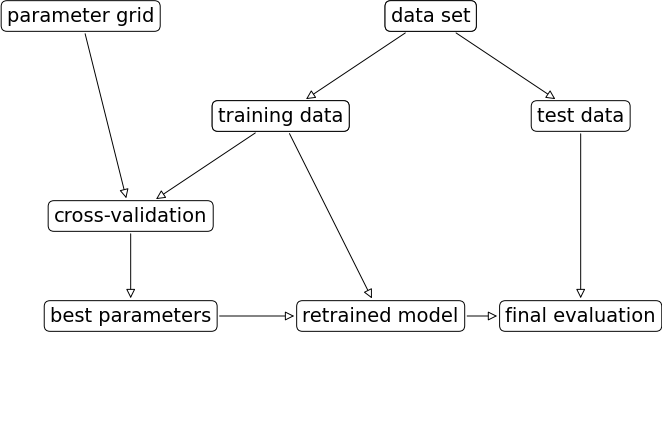

In [8]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [7]:
from sklearn.model_selection import GridSearchCV

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [8]:
hyperparam_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), hyperparam_grid, scoring='accuracy', refit=True, cv=kfold)
grid_search.fit(X_trainval, y_trainval)

print("Best score on validation set: {:.2f}".format(grid_search.best_score_))
print("Best hyperparameters: {}".format(grid_search.best_params_))

Best score on validation set: 0.98
Best hyperparameters: {'C': 10, 'gamma': 0.1}


In [9]:
y_test_hat = grid_search.predict(X_test)
test_score = accuracy_score(y_test, y_test_hat)
print("Test set score with best hyperparameters: {:.2f}".format(test_score))

Test set score with best hyperparameters: 0.97


In [10]:
grid_search.cv_results_

{'mean_fit_time': array([0.00220518, 0.0027627 , 0.00298386, 0.00211005, 0.00298772,
        0.00298419, 0.00258822, 0.0027638 , 0.00300426, 0.00258961,
        0.00280676, 0.00317564, 0.00259848, 0.00249305, 0.00219135,
        0.00240097, 0.00297713, 0.00440531, 0.00256376, 0.00220995,
        0.00199547, 0.00232859, 0.00454307, 0.00409083, 0.00294871,
        0.00227232, 0.00139532, 0.00179505, 0.00459843, 0.00349965,
        0.00200105, 0.00118904, 0.00144744, 0.00179176, 0.00318685,
        0.00302877]),
 'std_fit_time': array([7.56100511e-04, 4.03167343e-04, 9.04659498e-06, 2.53701451e-04,
        2.19684835e-05, 3.22627472e-05, 4.90945767e-04, 3.79770111e-04,
        5.40023924e-05, 4.86984095e-04, 4.07514298e-04, 3.65908151e-04,
        4.92252313e-04, 5.05551597e-04, 3.09319137e-04, 4.82218456e-04,
        2.85031381e-05, 1.17827671e-03, 4.67252568e-04, 4.25805474e-04,
        3.47993131e-06, 4.00996276e-04, 5.25313992e-04, 1.11343252e-03,
        2.42219168e-04, 3.91593800e-0

#### visualize the result of cross_validation

In [11]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

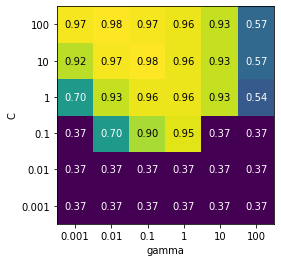

In [14]:
import matplotlib.pyplot as plt

scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=hyperparam_grid['gamma'],
                      ylabel='C', yticklabels=hyperparam_grid['C'], cmap="viridis")

#### SVC is sensitive to the setting of the hyperparameters.

#### we can also use list of dictionaries as the grid

In [15]:
hyperparam_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [16]:
grid_search = GridSearchCV(SVC(), hyperparam_grid, scoring='accuracy', refit=True, cv=kfold)
grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.98


## grid search with cross validation (without GridSearchCV)

#### how to apply scaling?

In [17]:
from sklearn.model_selection import GridSearchCV

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [26]:
'''TO DO'''
#왜 하냐? -> 한줄로만 하니까, train셋을 가지고 scaling을 적용해서 해보고싶다

for train_idx, validation_idx in kfold.split(X_trainval,y_trainval):
    X_train=X_trainval[train_idx]
    y_train=y_trainval[train_idx]
    X_validation=X_trainval[validation_idx]
    y_validation=y_trainval[validation_idx]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    scaled_X_train=scaler.transform(X_train)
    scaled_X_validation=scaler.transform(X_validation)
    scaled_X_test = scaler.transform(X_test)
    
    
    best_score=0
    
    for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
        for C in [0.001, 0.01, 0.1, 1, 10, 100]:
            svm=SVC(gamma=gamma,C=C)
            svm.fit(scaled_X_train,y_train)
            y_validation_hat = svm.predict(scaled_X_validation)
            
            score = accuracy_score(y_validation,y_validation_hat)
            
            if score>best_score:
                best_score = score
                
                best_parameters = {'C':C,'gamma':gamma}

                best_svm = svm
                best_scaled_X_test = scaled_X_test
                best_scaled_X_train = scaled_X_train
                best_scaeld_X_validation = scaled_X_validation
print("Best score on validation set: {:.2f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))
#val score의 mean을 하지 않았음 고쳐야됨 

Best score on validation set: 0.95
Best hyperparameters: {'C': 100, 'gamma': 0.01}


In [27]:
'''TO DO'''
y_test_hat = best_svm.predict(best_scaled_X_test)

test_score = accuracy_score(y_test, y_test_hat)
print("Test set score with best hyperparameters: {:.2f}".format(test_score))

Test set score with best hyperparameters: 0.97


In [15]:
#교수님 답안
scaler = StandardScaler()

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        score_val = []
        for train_idx , val_idx in kfold.split(X_trainval,y_trainval):
            
            X_train = X_trainval[train_idx]
            y_train = y_trainval[train_idx]
            X_valid = X_trainval[val_idx]
            y_valid = y_trainval[val_idx]
            
            
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_valid_scaled = scaler.transform(X_valid)
            svm = SVC(gamma=gamma, C=C)
            
            svm.fit(X_train_scaled, y_train)
            
            y_valid_hat = svm.predict(X_valid_scaled)
            
            score_val.append(accuracy_score(y_valid,y_valid_hat))
            
        mean_score = np.mean(score_val)
        
        if mean_score > best_score:
            best_score = mean_score
            best_parameters = {'C':C,'gamma':gamma}
            
            
print("Best score on validation set: {:.2f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

Best score on validation set: 0.97
Best hyperparameters: {'C': 100, 'gamma': 0.01}


In [17]:
#교수님 답안
svm = SVC(**best_parameters)
scaler.fit(X_trainval)

X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_trainval_scaled,y_trainval)


y_test_hat = svm.predict(X_test_scaled)
test_score = accuracy_score(y_test,y_test_hat)

print("Test set score with best hyperparameters: {:.2f}".format(test_score))

Test set score with best hyperparameters: 0.97


## class imbalance

In [19]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, stratify=y, random_state=0)

In [20]:
np.unique(y_train, return_counts=True)
#imbalance

(array([False,  True]), array([1212,  135], dtype=int64))

In [21]:
len(digits.data)

1797

#### None

In [22]:
tree = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
y_test_hat = tree.predict(X_test)

In [23]:
tree.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

Test score: 0.96
Test f1 score: 0.80
[[398   7]
 [ 10  35]]
AUC : 0.8802469135802469


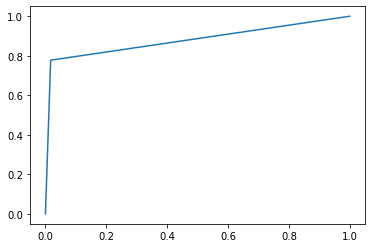

In [24]:
print("Test score: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print("Test f1 score: {:.2f}".format(f1_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

fpr, tpr, _ = roc_curve(y_test , tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
print("AUC : {}".format(roc_auc_score(y_test , tree.predict_proba(X_test)[:,1])))

#### Cost sensitive

In [258]:
tree = DecisionTreeClassifier(max_depth=20, class_weight='balanced').fit(X_train, y_train)
y_test_hat = tree.predict(X_test)

Test score: 0.96
Test f1 score: 0.80
[[396   9]
 [  9  36]]
AUC : 0.8888888888888888


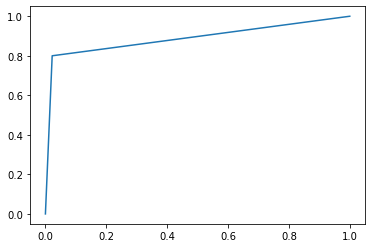

In [259]:
print("Test score: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print("Test f1 score: {:.2f}".format(f1_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

fpr, tpr, _ = roc_curve(y_test , tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
print("AUC : {}".format(roc_auc_score(y_test , tree.predict_proba(X_test)[:,1])))

#### Random Oversampling

In [20]:
'''TO DO'''
T_count=0
F_count=0
for i in y:
    if(i==True):
        T_count+=1
    else:
        F_count+=1

upper_count= round(F_count/T_count)

T_data=[]

for i in range(y.shape[0]):
    
    
    
    

9


In [26]:
over_no = y_train.sum()*9

In [32]:
np.where(y_train)

(array([   1,   13,   18,   31,   50,   59,   60,   74,   77,   80,   82,
         105,  121,  131,  137,  140,  144,  150,  154,  160,  177,  182,
         184,  203,  221,  223,  229,  242,  264,  299,  307,  322,  326,
         350,  357,  359,  363,  374,  381,  386,  409,  426,  439,  449,
         488,  503,  507,  518,  521,  522,  526,  539,  558,  560,  574,
         584,  586,  603,  606,  616,  620,  629,  651,  654,  659,  672,
         680,  721,  748,  754,  756,  761,  774,  777,  782,  786,  803,
         827,  829,  832,  833,  856,  860,  868,  877,  894,  895,  902,
         914,  947,  959,  966,  989,  990,  992,  993,  995,  997,  999,
        1013, 1025, 1037, 1040, 1041, 1046, 1055, 1066, 1072, 1102, 1118,
        1128, 1162, 1164, 1171, 1173, 1186, 1187, 1203, 1210, 1211, 1218,
        1221, 1227, 1238, 1269, 1275, 1304, 1312, 1313, 1322, 1324, 1325,
        1334, 1341, 1346], dtype=int64),)

In [32]:
y_train.nonzero() #np.where(y_train)

(array([   1,   13,   18,   31,   50,   59,   60,   74,   77,   80,   82,
         105,  121,  131,  137,  140,  144,  150,  154,  160,  177,  182,
         184,  203,  221,  223,  229,  242,  264,  299,  307,  322,  326,
         350,  357,  359,  363,  374,  381,  386,  409,  426,  439,  449,
         488,  503,  507,  518,  521,  522,  526,  539,  558,  560,  574,
         584,  586,  603,  606,  616,  620,  629,  651,  654,  659,  672,
         680,  721,  748,  754,  756,  761,  774,  777,  782,  786,  803,
         827,  829,  832,  833,  856,  860,  868,  877,  894,  895,  902,
         914,  947,  959,  966,  989,  990,  992,  993,  995,  997,  999,
        1013, 1025, 1037, 1040, 1041, 1046, 1055, 1066, 1072, 1102, 1118,
        1128, 1162, 1164, 1171, 1173, 1186, 1187, 1203, 1210, 1211, 1218,
        1221, 1227, 1238, 1269, 1275, 1304, 1312, 1313, 1322, 1324, 1325,
        1334, 1341, 1346], dtype=int64),)

In [27]:
positive_index = y_train.nonzero()[0]
over_index = np.random.choice(positive_index, over_no, replace=True)

In [28]:
X_train_add = X_train[over_index,:]
y_train_add = y_train[over_index]

In [29]:
X_train_over = np.concatenate((X_train, X_train_add))
y_train_over = np.concatenate((y_train, y_train_add)) #10배 불려짐.

In [30]:
tree = DecisionTreeClassifier(max_depth=20).fit(X_train_over, y_train_over)
y_test_hat = tree.predict(X_test)

Test score: 0.96
Test f1 score: 0.81
[[399   6]
 [ 10  35]]
AUC : 0.8814814814814814


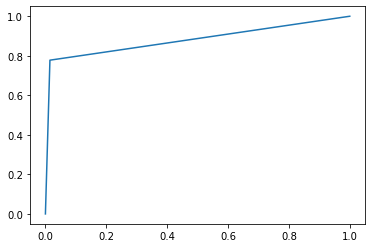

In [31]:
print("Test score: {:.2f}".format(accuracy_score(y_test, y_test_hat)))
print("Test f1 score: {:.2f}".format(f1_score(y_test, y_test_hat)))
print(confusion_matrix(y_test, y_test_hat))

fpr, tpr, _ = roc_curve(y_test , tree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
print("AUC : {}".format(roc_auc_score(y_test , tree.predict_proba(X_test)[:,1])))

#### you can use imblearn package
- https://imbalanced-learn.org/stable/index.html